Análisis Exploratorio de Datos

Paso 1: Configuramos pandas para visualizar los campas y registros completos, luego cargamos el archivo origen.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Configura Pandas para mostrar todo el texto en los campos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)  # Muestra todo el texto en cada columna
pd.set_option('display.expand_frame_repr', False)  # No usa salto de línea para mostrar el DataFrame

# Cargamos el Data Frame con el origen o fuente de los datos (archivo CSV)
df = pd.read_csv('Dataset/Procesados/data_movies.csv')

Paso 2: Realizamos una analisis visual de algunos registros para determinar un aproximado de estructura de los datos.

In [ ]:
df.head(5)
# El analisis visual nos muestra lo siguiente:
# Se observan entre varios columnas, 5 que contienen datos tipo cadena (4 semejan listas de diccionario y 1 diccionario)
# Tambien se observan datos nulos NaN, en ceros y vacios. 

Paso 3: Transponemos la primera fila para un analisis mas detallado de los campos de la fila.

In [ ]:
primera_fila = df.iloc[[0]] # Seleccionar la primera fila 
fila_transpuesta = primera_fila.transpose() # Usar el metodo transpose() para visualizar la fial y encabezados como columnas
fila_transpuesta  # Imprimimos en pantalla el registro para la observacion.
# El analisis visual nos muestra lo siguiente:
# La data esta en formato cadena porque proviene de un CSV, sin embargo podemos identificar datos 
# tipo fecha, texto, float, int, boleanos, en esencia esos serian campos a formatear en sus tipos.

Paso 4: Listamos las columnas para comprender mejor su significado y por ende los posibles valores en toda la data.

In [ ]:
# Listado de las columnas del Data Frame
print('Listado de Columnas =', df.columns)

Paso 5: Consultamos la informacion general de la data

In [ ]:
df.info()
# La data contiene 45.466 registros y 24 columnas
# Solo las columnas (revenue, runtime, vote_average, vote_count) tienen formato float64  
# Las demas columnas tienen el formato generico object.
# Recomendacion: En ETL transformar las columnas al tipo de dato adecuado evitando dejarlas como objetc.

In [ ]:
df.describe(include="all")  
# Estadistica descriptiva para todo los campos de tipo numerico, a pesar de mostrar todas las columnas.

In [ ]:
df.describe() 
# Estadistica descriptiva solo los campos de tipo numerico

Paso 6: Identificar valores faltantes en toda la data.

In [4]:
df.isnull().sum().sort_values(ascending=False)
# En lo general si la data fuese a tener otros requerimientos adicionales por ejemplo a los del proyecto individual,
# lo recomendable es analizar toda la data y tranformar todos los campos, evitando al maximo eliminar registros.
# falta trabajar los outlaier pero creo que eso es de ETL
# En ETL se pueden realizar las transformaciones segun el orden de los valores nulos de mayor cantidad a menor.

popularity      0
release_date    0
release_year    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [ ]:
# Visualizacion mas detallada de la data. 
df.info()

Graficas

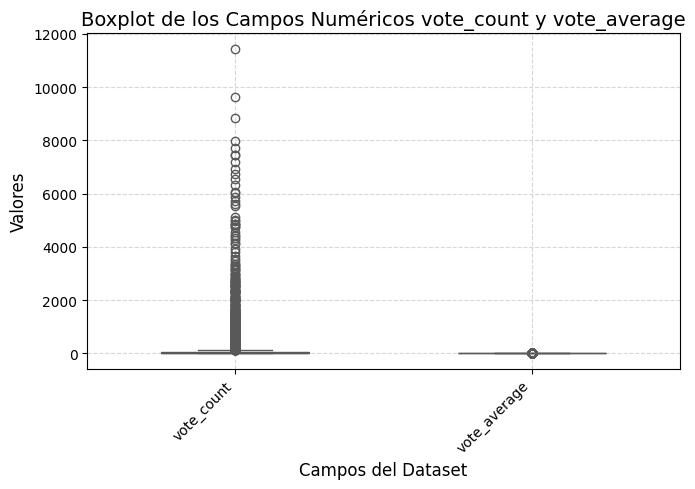

In [12]:
# Asumiendo que ya tienes el dataframe 'df' con las columnas 'budget' y 'revenue'
columnas = ['vote_count', 'vote_average']

# Crear el boxplot con seaborn para un estilo más atractivo
plt.figure(figsize=(7, 5))  # Tamaño de la figura
sns.boxplot(data=df[columnas], palette="Set2", width=0.5)

# Mejorar los ejes y el título
plt.xlabel('Campos del Dataset', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Boxplot de los Campos Numéricos vote_count y vote_average', fontsize=14)

# Añadir cuadrícula para mejor visualización
plt.grid(True, linestyle='--', alpha=0.5)

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta los márgenes para evitar que las etiquetas se salgan del gráfico
plt.show()

El grafico anterior nos muestra que buen porcentaje de las peliculas tuvieron muy buena votacion.

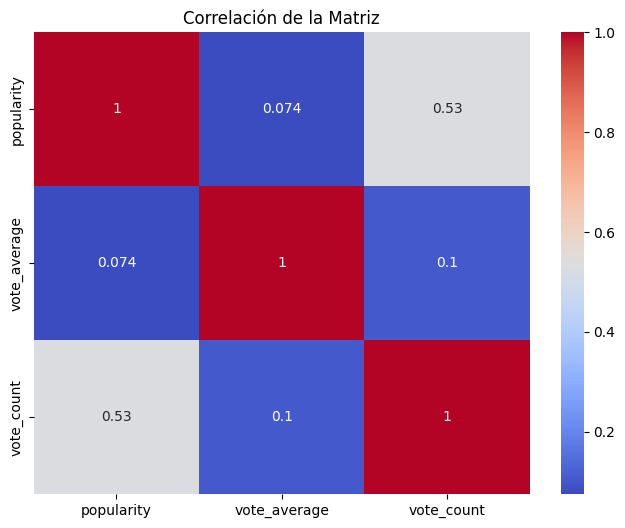

In [15]:
# Variables de interés: se analiza la relacion entre la variable presupuesto y lo recaudado
variables = df[['popularity','vote_average','vote_count']]

# Correlacion de los datos
correlation_matrix = variables.corr()

# Mapa de calor para visualizar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación de la Matriz')
plt.show()

El grafico anterior nos muestra que hay buena correlacion entre 'popularity' y 'vote_averaje', quiere decir esto que, mientras mas popular sea una pelicula es muy factible de tener buena votacion por lo cual aumenta su porcentaje.

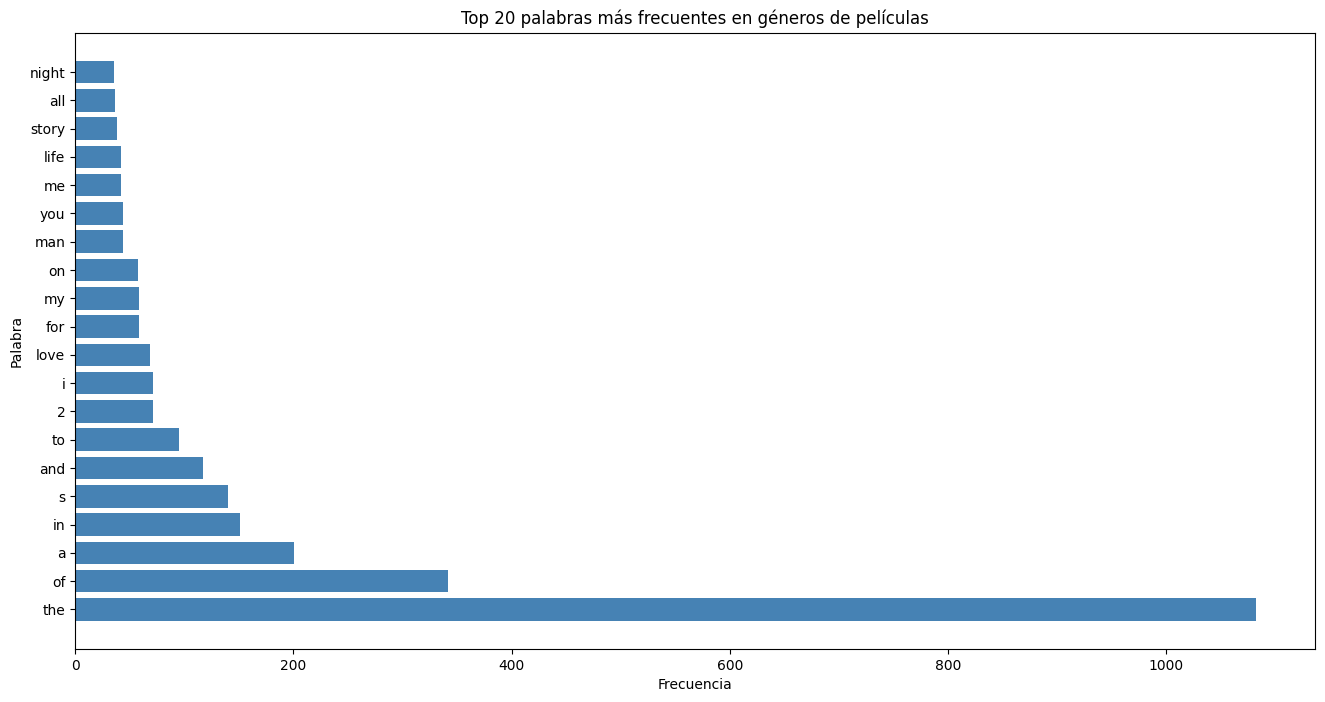

In [ ]:
# Concatenar todos los géneros en una cadena
all_title = " ".join(token for token in df["title"])

# Eliminar caracteres no alfabéticos y convertir todo a minúsculas
words = re.findall(r'\b\w+\b', all_title.lower())

# Contar las frecuencias de las palabras
word_freq = Counter(words)

# Obtener las 1500 palabras más comunes
most_common_words = word_freq.most_common(1500)

# Separar las palabras y sus frecuencias
words, frequencies = zip(*most_common_words)

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))
plt.barh(words[:20], frequencies[:20], color='steelblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras con más frecuentes en los titulos de peliculas')
plt.show()

En el anterior grafico si retiraramos los conectores de texto, las palabras mas comunes serian 'Love', 'Man', 'Life', 'story', 'night'